# Lab 02: Training with epochs -- exercise

In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS4243_codes/codes/labs_lecture05/lab02_epoch'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from random import randint
import utils

### Download the data and print the sizes

In [3]:
from utils import check_mnist_dataset_exists
data_path=check_mnist_dataset_exists()

train_data=torch.load(data_path+'mnist/train_data.pt')
train_label=torch.load(data_path+'mnist/train_label.pt')
test_data=torch.load(data_path+'mnist/test_data.pt')

### Make a ONE layer net class. 

In [4]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        
        # 一层全连接网络MLP
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        
        # 直接输出
        scores = self.linear_layer(x)
        return scores

### Build the net

In [5]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


### Choose the criterion, optimizer, batchsize, learning rate

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer=torch.optim.SGD( net.parameters() , lr=0.01 )

bs=50

# You only have stuff to do in this cell

### Do 15 passes through the training set

In [7]:
for epoch in range(15): # COMPLETE
    
    # COMPLETE
    shuffled_indices = torch.randperm(60000)
    print(shuffled_indices)
 
    for iter in range(0, 60000, bs): # COMPLETE
        
        # Set dL/dU, dL/dV, dL/dW to be filled with zeros
        optimizer.zero_grad()
        
        # create a minibatch
        # 这里不需要再随机抽取样本，因为shuffled_indices已经是随机的
        # COMPLETE
        indices = shuffled_indices[iter:iter + bs]
        # COMPLETE
        minibatch_data = train_data[indices]
        # COMPLETE
        minibatch_label = train_label[indices]

        # reshape the minibatch
        # 200 x 784
        inputs = minibatch_data.view(bs,784)
        
        # tell Pytorch to start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()
        
        # forward the minibatch through the net
        scores = net(inputs) 

        # Compute the average of the losses of the data points in the minibatch
        loss = criterion(scores , minibatch_label) 
 
        # backward pass to compute dL/dU, dL/dV and dL/dW
        loss.backward()

        optimizer.step()

tensor([22415, 14490, 19889,  ..., 52381, 37427, 49515])
tensor([ 5717, 21342,  6324,  ..., 25417,  3063,  5715])
tensor([36898, 18178, 16584,  ..., 30011, 13685, 29849])
tensor([48697,  8285,  7583,  ..., 49355, 47502, 37173])
tensor([10893, 47952, 23171,  ...,  6341, 43337, 48905])
tensor([17983, 21441, 17880,  ..., 47922, 38363, 45527])
tensor([10828, 22800, 44999,  ..., 34818, 15432, 26497])
tensor([48849, 54057, 20431,  ..., 42144, 13263, 58145])
tensor([ 5160, 10188, 12917,  ..., 11678, 50655, 20046])
tensor([14293, 13197,  9022,  ..., 10998, 56071, 30300])
tensor([51562, 57378, 50273,  ..., 14789, 38582, 12863])
tensor([24569, 52692, 29417,  ..., 43776, 21445, 35455])
tensor([47546, 26070, 18787,  ..., 33751, 29611, 23083])
tensor([29178,  7626, 52807,  ..., 41766, 18357, 52862])
tensor([57910, 15858, 28550,  ..., 22140,  8616, 53772])


### Choose image at random from the test set and see how good/bad are the predictions

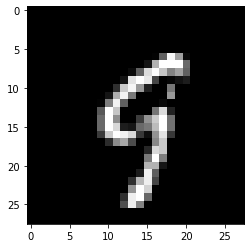

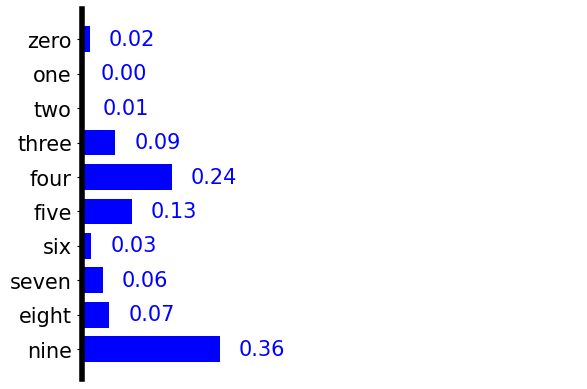

In [8]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores =  net( im.view(1,784)) 
probs= torch.softmax(scores, dim=1)
utils.show_prob_mnist(probs)